In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from sqlalchemy import create_engine
from scipy.stats import zscore
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
years = df["YEAR"].unique()

for col in list(df.columns[3:]):
    for year in years:
        null_index = df[(df["YEAR"] == year) & (df[col].isnull())][col].index
        df.loc[null_index, [col]] = df[df["YEAR"] == year][col].mean()

In [5]:
for col in list(df.columns[3:]):
    for year in years:
        null_index = df[(df["YEAR"] == year) & (df[col].isnull())][col].index
        df.loc[null_index, [col]] = df.interpolate(inplace=True)

Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?
If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

outliers: 27


(array([710., 388., 228.,  62.,  45.,  32.,   9.,   6.,   5.,   7.]),
 array([  465650. ,  5696770.3, 10927890.6, 16159010.9, 21390131.2,
        26621251.5, 31852371.8, 37083492.1, 42314612.4, 47545732.7,
        52776853. ]),
 <a list of 10 Patch objects>)

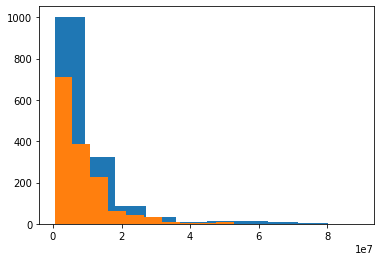

In [7]:
df2 = df.copy()
zscores = zscore(df2.TOTAL_REVENUE)
print('outliers: {}'.format(len(list(np.where(zscores > 4)[0]))))
plt.hist(df2.TOTAL_REVENUE)

greater = list(np.where(zscores > 4)[0])
for row in greater:
    df2.loc[row, ['TOTAL_REVENUE']] = df2['TOTAL_REVENUE'].mean()
plt.hist(df2.TOTAL_REVENUE)

outliers: 57


(array([491., 303., 272., 223.,  64.,  39.,  30.,  21.,  28.,  21.]),
 array([  481665. ,  3555457.4,  6629249.8,  9703042.2, 12776834.6,
        15850627. , 18924419.4, 21998211.8, 25072004.2, 28145796.6,
        31219589. ]),
 <a list of 10 Patch objects>)

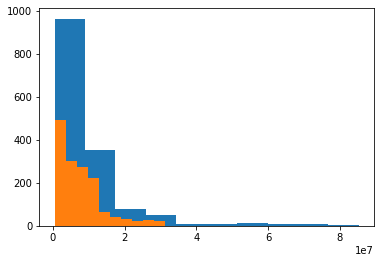

In [85]:
df2 = df.copy()
zscores = zscore(df2.TOTAL_EXPENDITURE)
print('outliers: {}'.format(len(list(np.where(zscores > 2)[0]))))
plt.hist(df2.TOTAL_EXPENDITURE)

greater = list(np.where(zscores > 2)[0])
for row in greater:
    df2.loc[row, ['TOTAL_EXPENDITURE']] = df2['TOTAL_EXPENDITURE'].mean()
plt.hist(df2.TOTAL_EXPENDITURE)

Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

outliers: 22


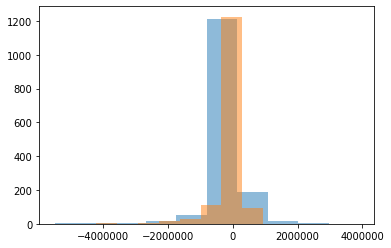

In [86]:
df['DEFICIT'] = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
zscores = zscore(df.DEFICIT)
print('outliers: {}'.format(len(list(np.where(zscores > 2)[0]))))
plt.hist(df.DEFICIT, alpha = .5)

greater = list(np.where(zscores > 2)[0])
for row in greater:
    df.loc[row, ['DEFICIT']] = df['DEFICIT'].mean()
plt.hist(df.DEFICIT, alpha = .5)
plt.show()

Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

outliers: 57


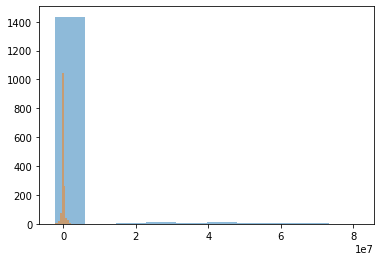

In [87]:
df2['DEFICIT'] = df2.TOTAL_REVENUE - df2.TOTAL_EXPENDITURE
zscores = zscore(df2.DEFICIT)
print('outliers: {}'.format(len(list(np.where(zscores > 2)[0]))))
plt.hist(df2.DEFICIT, alpha = .5)
greater = list(np.where(zscores > 2)[0])
for row in greater:
    df2.loc[row, ['DEFICIT']] = df2['DEFICIT'].mean()
plt.hist(df2.DEFICIT, alpha = .5)
plt.show()

Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

In [88]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,DEFICIT
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03
mean,2004.433646,9.107018e+05,9.153316e+06,7.750895e+05,4.244638e+06,4.133589e+06,9.265104e+06,4.792203e+06,2.699314e+06,4.281290e+05,...,60720.338343,51334.094208,4.906595e+05,2.335253e+05,7.829544e+05,232.453444,275.568540,218.597683,263.654369,-1.359328e+05
std,7.393983,9.804669e+05,1.092021e+07,1.067734e+06,5.150863e+06,5.096356e+06,1.113642e+07,5.849160e+06,3.119208e+06,4.929789e+05,...,76736.594217,65994.411647,6.255796e+05,2.991176e+05,9.210614e+05,9.284925,8.455096,5.689836,4.752587,4.887180e+05
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,-5.487742e+06
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10936.500000,9782.750000,8.638100e+04,4.236525e+04,1.842418e+05,225.669490,270.182528,215.575271,261.499446,-2.095995e+05
50%,2004.000000,7.604805e+05,6.055223e+06,4.694965e+05,2.940125e+06,2.551996e+06,6.160492e+06,3.163640e+06,1.780190e+06,3.189561e+05,...,41139.500000,35227.500000,3.327785e+05,1.567610e+05,5.991710e+05,234.067087,275.877097,219.518164,263.163920,-3.959900e+04
75%,2011.000000,9.491093e+05,1.156703e+07,9.308812e+05,5.310651e+06,5.179914e+06,1.178409e+07,6.004265e+06,3.443534e+06,5.223475e+05,...,72598.250000,65297.648148,5.783400e+05,2.843505e+05,8.841245e+05,239.815431,281.909337,222.123041,266.832438,2.944225e+04
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,9.362140e+05


In [89]:
df2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,DEFICIT
count,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,...,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03
mean,2004.433646,9.107018e+05,9.153316e+06,7.750895e+05,4.244638e+06,4.133589e+06,7.553894e+06,4.792203e+06,2.699314e+06,4.281290e+05,...,60720.338343,51334.094208,4.906595e+05,2.335253e+05,7.829544e+05,232.453444,275.568540,218.597683,263.654369,-2.409363e+04
std,7.393983,9.804669e+05,1.092021e+07,1.067734e+06,5.150863e+06,5.096356e+06,6.286458e+06,5.849160e+06,3.119208e+06,4.929789e+05,...,76736.594217,65994.411647,6.255796e+05,2.991176e+05,9.210614e+05,9.284925,8.455096,5.689836,4.752587,3.956783e+05
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102,-2.372929e+06
25%,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,...,10936.500000,9782.750000,8.638100e+04,4.236525e+04,1.842418e+05,225.669490,270.182528,215.575271,261.499446,-1.811838e+05
50%,2004.000000,7.604805e+05,6.055223e+06,4.694965e+05,2.940125e+06,2.551996e+06,6.160492e+06,3.163640e+06,1.780190e+06,3.189561e+05,...,41139.500000,35227.500000,3.327785e+05,1.567610e+05,5.991710e+05,234.067087,275.877097,219.518164,263.163920,-2.456400e+04
75%,2011.000000,9.491093e+05,1.156703e+07,9.308812e+05,5.310651e+06,5.179914e+06,1.059209e+07,6.004265e+06,3.443534e+06,5.223475e+05,...,72598.250000,65297.648148,5.783400e+05,2.843505e+05,8.841245e+05,239.815431,281.909337,222.123041,266.832438,5.429055e+04
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,3.121959e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130,2.520706e+06


If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?

The 3rd. Outliers are easily lost after transformations, and I'd rather not lose them in the dataframe. I assume any outliers are in the original dataframe because the data was inputted incorrectly.